# Interlocking analysis for Assemblies of possibly non convex Polyhedra

In [1]:
include("../Polyhedron.jl")
include("../examples.jl")
include("../decomposition.jl")
include("../plotting.jl")
include("../merging.jl")
include("../polygonal_geometry.jl")
include("../InterlockingTest.jl")

testComputeIntersection2 (generic function with 1 method)

In [ ]:
ass, frame = assembly2(12,5,3,7)
colors = [RGB(0.5,0.5,0.5) for block in ass]
colors[frame] .= RGB(1,0,0)

plot(ass, colors = colors, width = 600, height = 600, drawverts = false)

In [ ]:
ass, frame, link = assembly3(8,8,2,3)
colors = [RGB(0.5,0.5,0.5) for block in ass]
colors[frame] .= RGB(1,0,0)
colors[link] .= RGB(0,0,1)

plot(ass, colors = colors, width = 600, height = 600, drawverts = false)

In [124]:
tiblock(6,3,2)

Polyhedron embedded into 3-space with 24 vertices, 48 edges and 26 facets.
 
Edges:  [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 1], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 7], [1, 7], [2, 8], [3, 9], [4, 10], [5, 11], [6, 12], [8, 13], [13, 2], [7, 14], [14, 1], [13, 14], [2, 15], [15, 13], [1, 16], [16, 14], [15, 16], [13, 17], [17, 8], [14, 18], [18, 7], [17, 18], [11, 19], [19, 5], [10, 20], [20, 4], [19, 20], [5, 21], [21, 19], [4, 22], [22, 20], [21, 22], [19, 23], [23, 11], [20, 24], [24, 10], [23, 24]]
Facets: [[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [2, 3, 9, 8], [3, 4, 10, 9], [5, 6, 12, 11], [6, 1, 7, 12], [2, 8, 13], [1, 7, 14], [13, 2, 15], [14, 1, 16], [2, 15, 16, 1], [15, 13, 14, 16], [8, 13, 17], [7, 14, 18], [13, 17, 18, 14], [17, 8, 7, 18], [5, 11, 19], [4, 10, 20], [19, 5, 21], [20, 4, 22], [5, 21, 22, 4], [21, 19, 20, 22], [11, 19, 23], [10, 20, 24], [19, 23, 24, 20], [23, 11, 10, 24]] 


In [ ]:
setprecision(128)

sideelem = nprism(3)
set_verts!(sideelem, map(v -> map(entry -> parse(BigFloat, "$(entry)"), v), get_verts(sideelem)))
merge!(sideelem, nprism(3), [[3,1,6,4]], [[1,2,4,5]])
merge!(sideelem, nprism(3), [[2,3,5,6]], [[1,2,4,5]])
sideelemtriang = triangulate(sideelem)
display(plot(sideelemtriang, labels = true))
display(get_edges(sideelemtriang)[[!isturnable(e, sideelemtriang) for e in get_edges(sideelemtriang)]])
isconvex(sideelemtriang)


In [ ]:
poly = merge(nprism(5), nprism(3), [[1,2,7,6]], [[4,1,2,5]])
merge!(poly, nprism(3), [[12,11,7,6]], [[4,1,2,5]])
merge!(poly, )
plot(poly, labels = true)

## Experimente

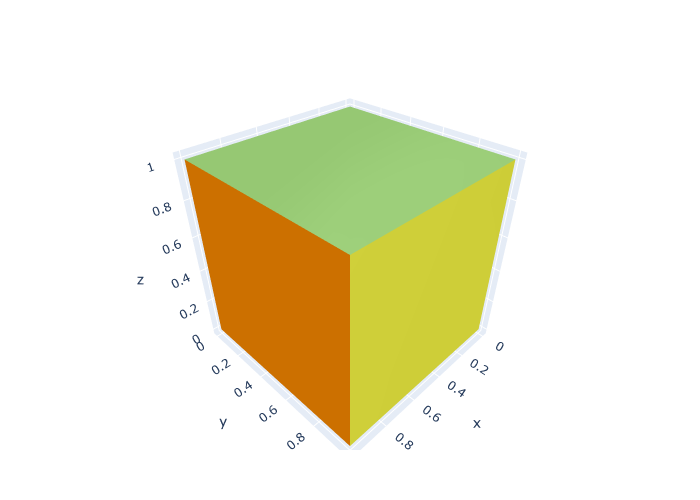

In [17]:
using PlotlyJS

p = Plot()

plot(mesh3d(
    x=[0, 1, 2, 0],
    y=[0, 0, 1, 2],
    z=[0, 2, 0, 1],
    #colorbar_title="z",
    colorscale=[[0, "gold"],
                [0.5, "mediumturquoise"],
                [1, "magenta"]],
    # Intensity of each vertex, which will be interpolated and color-coded
    intensity=[0, 0,0,0],
    # i, j and k give the vertices of triangles
    # here we represent the 4 triangles of the tetrahedron surface
    i=[0, 0, 0, 1],
    j=[1, 2, 3, 2],
    k=[2, 3, 1, 3],
    name="y",
    showscale=true
))

facecolor = repeat([
    "rgb(50, 200, 200)",
    "rgb(100, 200, 255)",
    "rgb(150, 200, 115)",
    "rgb(200, 200, 50)",
    "rgb(230, 200, 10)",
    "rgb(255, 140, 0)"
], inner=[2])

t = mesh3d(
    x=[0, 0, 1, 1, 0, 0, 1, 1],
    y=[0, 1, 1, 0, 0, 1, 1, 0],
    z=[0, 0, 0, 0, 1, 1, 1, 1],
    i=[7, 0, 0, 0, 4, 4, 2, 6, 4, 0, 3, 7],
    j=[3, 4, 1, 2, 5, 6, 5, 5, 0, 1, 2, 2],
    k=[0, 7, 2, 3, 6, 7, 1, 2, 5, 5, 7, 6],
    facecolor=facecolor)

plot(t)
